# UCI Data Set: Person Income Prediction

## Introduction
  This data set contains weighted census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau.  The data contains 41 demographic and employment related variables.

  The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should *not* be used in the classifiers.

  One instance per line with comma delimited fields. There are 199523 instances in the data file and 99762 in the test file.

  The data was split into train/test in approximately 2/3, 1/3 proportions using MineSet's MIndUtil mineset-to-mlc.

## Prediction Task
  Prediction task is to determine the income level for the person represented by the record.  Incomes have been binned at the $50K level to present a binary classification problem, much like the original UCI/ADULT database.  The goal field of this data, however, was drawn from the "total person income" field rather than the "adjusted gross income" and may, therefore, behave differently than the orginal ADULT goal field.
  
## Data Description
| Total Count   | Feature Count |
| ------------- | ------------- |
|     199523    |       38      |
  
## Feature Description
- age(continuous)
- class_of_worker(nominal)
- detailed_industry_recode(nominal)
    - Numerical representation of major industry code. This column will be ignored.
- detailed_occupation_recode(nominal)
    - Numerical representation of major occupation code. This column will be ignored.    
- education_level(nominal)
- wage_per_hour(continues)
- enrolled_in_edu_inst_last_wk(nominal)
    - Not in universe, high school, college or university
- marital_status(nominal)
- major_industry_code(nominal)
    - different kinds of job categories
- major_occupation_code(nominal)
- race(nominal)
- hispanic_origin(nominal)
- sex(nominal)
- member_of_a_laber_union(nominal)
- reason_for_unemployment(nominal)
- full_or_part_time_employment_stat(nominal)
- capital_gains(continues)
- capital_losses(continues)
- divdends_from_stocks(continues)
- tax_filer_status(nominal)
- region_of_previous_residence(nominal)
- state_of_previous_residence(nominal)
- detailed_household_and_family_stat(nominal)
    - detailed information of child and grandchild in the family
- detailed household summary in household_household(nominal)
- instance_weight 
    - *The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should **not** be used in the classifiers.*
- migration_code_change_in_msa(nominal)
    - Migration Skills Assessment
- migration_code_change_in_reg(nominal)
- migration_code_move_within_reg(nominal)
- live_in_this_house_1_year_ago(nominal)
- migration_prev_res_in_sunbelt(nominal)
- num_persons_worked_for_employer(continuous)
- family_members_under_18(nominal)
- country_of_birth_father(nominal)
- country_of_birth_mother(nominal)
- country_of_birth_self(nominal)
- citizenship(nominal)
- own_business_or_self_employed(nominal)
- fill_inc_questionnaire_for_veterans_admin(nominal)
- veterans_benefits(nominal)
- weeks_worked_in_year(continues)
- year(nominal)

## Label
- total_person_income(nominal): 50000+ or -50000

In [208]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import re

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score

In [120]:
path = "data/census-income.data"
column_names = [
    "age",
    "class_of_worker",
    "detailed_industry_recode",
    "detailed_occupation_recode",
    "education_level",
    "wage_per_hour",
    "enrolled_in_edu_inst_last_wk",
    "marital_status",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_laber_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "capital_gains",
    "capital_losses",
    "divdends_from_stocks",
    "tax_filer_status",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "instance_weight",
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "num _persons_worked_for_employer",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits",
    "weeks_worked_in_year",
    "year",
    "total_person_income"
]

data = pd.read_csv(
    path, 
    names=column_names, 
    index_col=False,
    na_values=[' ?', ' Not in universe', ' Not in universe or children'])
data = data.drop(columns=['instance_weight', 'detailed_industry_recode', 'detailed_occupation_recode'])
train_data, val_data = train_test_split(data, train_size = 0.7, test_size = 0.3, shuffle = True)
test_data = None

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139666 entries, 108022 to 141334
Data columns (total 39 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   age                                        139666 non-null  int64 
 1   class_of_worker                            69358 non-null   object
 2   education_level                            139666 non-null  object
 3   wage_per_hour                              139666 non-null  int64 
 4   enrolled_in_edu_inst_last_wk               8722 non-null    object
 5   marital_status                             139666 non-null  object
 6   major_industry_code                        69057 non-null   object
 7   major_occupation_code                      69057 non-null   object
 8   race                                       139666 non-null  object
 9   hispanic_origin                            139666 non-null  object
 10  sex            

In [122]:
train_data.head(10)

,age,class_of_worker,education_level,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,total_person_income
108022,20,NaN,Some college but no degree,0,College or university,Never married,NaN,NaN,Asian or Pacific Islander,All other,...,Vietnam,Vietnam,United-States,Native- Born in the United States,0,NaN,2,0,94,- 50000.
14293,2,NaN,Children,0,NaN,Never married,NaN,NaN,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
186942,2,NaN,Children,0,NaN,Never married,NaN,NaN,White,Puerto Rican,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,- 50000.
95395,15,Private,7th and 8th grade,0,NaN,Never married,Private household services,Private household services,Black,All other,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,20,95,- 50000.
66434,11,NaN,Children,0,NaN,Never married,NaN,NaN,White,Mexican-American,...,Mexico,Mexico,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
90756,69,Self-employed-not incorporated,High school graduate,0,NaN,Married-civilian spouse present,Agriculture,Farming forestry and fishing,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,2,NaN,2,52,95,- 50000.
158795,46,State government,Masters degree(MA MS MEng MEd MSW MBA),0,NaN,Married-civilian spouse present,Education,Professional specialty,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,40,95,- 50000.
165852,41,Local government,High school graduate,0,NaN,Married-civilian spouse present,Public administration,Protective services,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,2,NaN,2,52,95,50000+.
131098,78,NaN,5th or 6th grade,0,NaN,Widowed,NaN,NaN,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
176781,6,NaN,Children,0,NaN,Never married,NaN,NaN,White,All other,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,- 50000.


In [155]:
print('Part of missing values for every column')
print(train_data.isnull().sum()/len(train_data))
dropped_columns = train_data.columns[train_data.isnull().sum() != 0].values.tolist()
dropped_columns.append('detailed_household_and_family_stat')


Part of missing values for every column
age                                          0.000000
class_of_worker                              0.503401
education_level                              0.000000
wage_per_hour                                0.000000
enrolled_in_edu_inst_last_wk                 0.937551
marital_status                               0.000000
major_industry_code                          0.505556
major_occupation_code                        0.505556
race                                         0.000000
hispanic_origin                              0.000000
sex                                          0.000000
member_of_a_laber_union                      0.904379
reason_for_unemployment                      0.969241
full_or_part_time_employment_stat            0.000000
capital_gains                                0.000000
capital_losses                               0.000000
divdends_from_stocks                         0.000000
tax_filer_status                          

In [124]:
features = train_data.columns.values.tolist()
del features[38]
numeric_features = ['age', 
                    'wage_per_hour', 
                    'capital_gains', 
                    'capital_losses', 
                    'divdends_from_stocks', 
                    'num_persons_worked_for_employer',
                    'weeks_worked_in_year'
                   ]
categorical_features = list(set(features) - set(numeric_features))

In [115]:
ds = train_data['total_person_income'].value_counts().reset_index()
ds.columns = [
    'income_type', 
    'percent']

ds['percent'] /= len(train_data)
fig = px.pie(
    ds,
    names='income_type',
    values='percent',
    title='Percent of income types'
)
fig.show()

In [116]:
def distribution_plot(column_name):
    fig = go.Figure()
    ds = train_data[column_name].value_counts().reset_index()
    ds.columns = [
        column_name, 
        'count'
    ]

    fig.add_trace(
        go.Bar(
            name='all',
            x=ds[column_name], 
            y=ds['count'], 
        ))
    ds = train_data[train_data['total_person_income'] == ' 50000+.'][column_name].value_counts().reset_index()
    ds.columns = [
        column_name, 
        'count'
    ]

    fig.add_trace(
        go.Bar(
            name='50000+',
            x=ds[column_name], 
            y=ds['count'], 
        ))
    fig.update_layout(title=column_name+' distribution')
    fig.show()
    age_count = train_data[column_name].value_counts().reset_index()
    age_count.columns = [
        column_name, 
        'count'
    ]

    age_positive_percent = train_data[train_data['total_person_income'] == ' 50000+.'][column_name].value_counts().reset_index()
    age_positive_percent.columns = [
        column_name, 
        'percent'
    ]

    age_positive_percent['percent'] /= age_count['count']
    fig = px.bar(
        age_positive_percent, 
        x=column_name, 
        y='percent',  
        title='50000+ percent sorted by '+column_name 
    )
    fig.show()

In [125]:
distribution_plot('reason_for_unemployment')

In [117]:
column_names = [
    "age",
    "class_of_worker",
    "education_level",
    "wage_per_hour",
    "enrolled_in_edu_inst_last_wk",
    "marital_status",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_laber_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "capital_gains",
    "capital_losses",
    "divdends_from_stocks",
    "tax_filer_status",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "num _persons_worked_for_employer",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits",
    "weeks_worked_in_year",
    "year"
]

for column_name in column_names:
    distribution_plot(column_name)

In [184]:
X_train = train_data.drop(columns = 'total_person_income')
y_train = train_data['total_person_income']

label_encoders = {}

label_encoder = LabelEncoder()
y_train_transformed = label_encoder.fit_transform(y_train)
label_encoders['y'] = label_encoder

X_train_transformed = pd.DataFrame()
for column in X_train.columns:
    if column in dropped_columns:
        continue
    if column in categorical_features:
        label_encoder = LabelEncoder()
        X_train_transformed[column] = label_encoder.fit_transform(X_train[column])
        label_encoders[column] = label_encoder
    else:
        X_train_transformed[column] = X_train[column]

In [185]:
X_train_transformed.columns

Index(['age', 'education_level', 'wage_per_hour', 'marital_status', 'race',
       'hispanic_origin', 'sex', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'divdends_from_stocks',
       'tax_filer_status', 'detailed_household_summary_in_household',
       'live_in_this_house_1_year_ago', 'num _persons_worked_for_employer',
       'citizenship', 'own_business_or_self_employed', 'veterans_benefits',
       'weeks_worked_in_year', 'year'],
      dtype='object')

In [209]:
my_model = XGBClassifier()
my_model.fit(X_train_transformed, y_train_transformed)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
y_train_pred = my_model.predict(X_train_transformed)
prediction = [round(value) for value in y_train_pred]

In [211]:
confusion_matrix(y_train_transformed, prediction)

array([[129926,   1017],
       [  4550,   4173]])

In [212]:
accuracy_score(y_train_transformed, prediction)

0.9601406211962825

In [213]:
X_val = val_data.drop(columns = 'total_person_income')
y_val = val_data['total_person_income']

y_val_transformed = label_encoders['y'].transform(y_val)

X_val_transformed = pd.DataFrame()
for column in X_val.columns:
    if column in dropped_columns:
        continue
    if column in categorical_features:
        X_val_transformed[column] = label_encoders[column].transform(X_val[column])
    else:
        X_val_transformed[column] = X_val[column]

In [214]:
y_val_pred = my_model.predict(X_val_transformed)
prediction = [round(value) for value in y_val_pred]

In [215]:
confusion_matrix(y_val_transformed, prediction)

array([[55625,   573],
       [ 2100,  1559]])

In [216]:
accuracy_score(y_val_transformed, prediction)

0.9553435688390665

In [217]:
my_model.

AttributeError: 'XGBClassifier' object has no attribute 'evals_'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

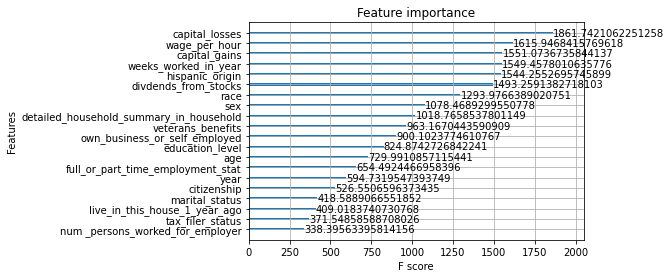

In [221]:
plot_importance(my_model, importance_type = 'cover')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

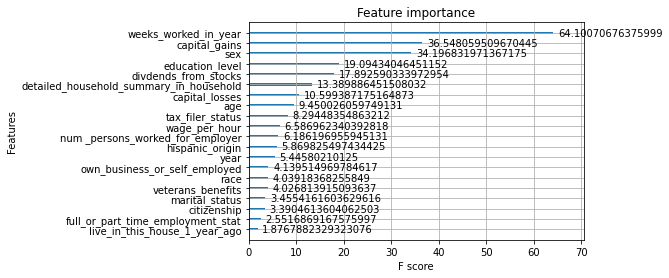

In [220]:
plot_importance(my_model, importance_type = 'gain')